# 2025.05.27. 코딩 테스트 스터디: 제2회

## Sorting

* 데이터 집합을 일정한 **순서**로 바꾸어 늘어놓는 작업.

* 검색을 더 쉽게.

* e.g. Ascending Order(오름차순) & Descending Order(내림차순)

* [Python Official Document: Sorting Techniques](https://docs.python.org/3/howto/sorting.html#sorting-techniques)

## Stability

```python
# 프로그래머스: 실패율
#
# 입출력 예
# N: 4, stages: [4, 4, 4, 4, 4]
# result = [4, 1, 2, 3]
```

**실패율이 동일한 1스테이지, 2스테이지, 3스테이지 간의 순서는 sorting 이후에 어떻게 될까요?**

* **Stable Sort**: 동일한 값은 가진 원소들 사이의 상대적인 순서가 sorting 후에도 유지됩니다.

> Bubble Sort
>
> Insertion Sort
>
> Merge Sort

* **Unstable Sort**: not stable

> Selection Sort
>
> Quick Sort
>
> Heap Sort

* Python의 기본 sorting algorithm은 **Timsort**(Merge + Insertion)입니다.

: `list.sort()`, `sorted()`

## Internal vs External

* **Internal Sorting**: 모든 데이터를 하나의 배열에 저장할 수 있는 경우. **우리가 아는 대부분의 정렬 알고리즘**이 여기에 속해요.

* **External Sorting**: 데이터가 너무 많아서 RAM에 다이렉트로 올릴 수 없는 경우. **별도의 작업용 파일**이 필요하고, 연산 과정도 복잡해요.

## 코딩 테스트에 적합한 정렬 공부?

* 저도 잘 몰라요, 근데 제 생각은...

* 버블, 선택, 삽입, $O(n^2)$짜리 써먹지도 않는거 언제 다 배우고 앉았냐...

* 맛있는 거만 골라 먹읍시다.

* 일단 세 가지 준비해봤는데요, 일단 가장 많이 쓰이는 1번 built-in sorting만 마스터해봅시다. 

* 나머지 2번, 3번은 나중에 챙겨드세요..!

### 1. Python built-in sorting: `list.sort()`, `sorted()`

* `list.sort()` -> `None`
    * a **method** of class `list`
    * in-place sort

* `sorted(iterables)` -> `list`
    * this **function** returns a list which is a result of sorting
    * no modification in the original.

#### Params

* `key`
    * 각 원소를 비교하기 전에 호출할 **함수**
    * 원소를 입력받고, 정렬에 사용될 "키 값"을 반환
    * 복잡한 객체를 특정 속성 기준으로 정렬하거나, 특정 계산 결과를 기준으로 정렬할 때 유용해요
    * w/ `lambda` in general

* `reverse`
    * if `True`: Descending Order
    * if `False`(default): Ascending Order

* `list.sort()`와 `sorted()`는 위의 두 파라미터를 공유해요.

**e.g. `names`는 학생들의 이름이 담긴 리스트입니다.**

1. 이름 길이가 긴 순으로 정렬해봅시다.

2. 대소문자 구분 없이 a -> z 순으로 정렬해봅시다.

In [2]:
names = ["alice", "Bob", "Charlie", "david"]

In [8]:
# 1.
sorted(names, key=len, reverse=True)

['Charlie', 'alice', 'david', 'Bob']

In [20]:
# 2.
sorted(names, key= lambda x : x.lower())

['alice', 'Bob', 'Charlie', 'david']

In [ ]:
# 2. What if?


**e.g. `student_tuples`는 세 명의 학생의 이름, 성적, 나이 데이터 튜플을 담은 리스트입니다.** 

**우리는 우선 성적 기준 내림차순으로 정렬한 뒤, 성적이 같은 학생들이 있다면 그들끼리는 나이 기준 오름차순 정렬하고 싶습니다.**

subject to:

* A는 알파벳 중에 비트가 제일 낮은 문자이지만, 의미상으로는 가장 높은 성적에 해당합니다.

In [15]:
student_tuples = [
    ('john', 'A', 15),
    ('jane', 'B', 12),
    ('dave', 'B', 10),
]

In [27]:
sorted(student_tuples, key= lambda x : (x[1],x[2]))

[('john', 'A', 15), ('dave', 'B', 10), ('jane', 'B', 12)]

**동일한 조건에서 나이는 내림차순 정렬하고 싶다면요?**

In [30]:
sorted(student_tuples, key= lambda x : (x[1],-x[2]))

[('john', 'A', 15), ('jane', 'B', 12), ('dave', 'B', 10)]

In [ ]:
#이름 역순		-x[0]
#성적 역순		-x[1]
#나이 오름차순	 x[2]

#### Are they stable?

In [1]:
data = [('apple', 5), ('banana', 3), ('orange', 5), ('grape', 3)]

# 1. 먼저 과일 이름(첫 번째 요소)으로 정렬 (기본 오름차순)
data.sort(key=lambda x: x[0]) # 이미 알파벳 순으로 정렬되어 있다고 가정하거나 정렬
print(data)
# -> [('apple', 5), ('banana', 3), ('grape', 3), ('orange', 5)]

[('apple', 5), ('banana', 3), ('grape', 3), ('orange', 5)]


In [2]:
# 2. 그 다음 숫자(두 번째 요소)로 정렬 (오름차순)
# key=lambda x: x[1] 로 정렬하면, 숫자가 같은 ('banana', 3)과 ('grape', 3)의 순서,
# 그리고 ('apple', 5)와 ('orange', 5)의 순서가 이전 정렬(또는 원본)의 순서를 따릅니다.
sorted_by_number = sorted(data, key=lambda x: x[1])
print(sorted_by_number)

[('banana', 3), ('grape', 3), ('apple', 5), ('orange', 5)]


In [3]:
# 출력: [('banana', 3), ('grape', 3), ('apple', 5), ('orange', 5)]
# ('banana', 3)이 ('grape', 3)보다 먼저 나왔으므로 (알파벳순으로), 숫자 정렬 후에도 이 순서 유지.
# ('apple', 5)가 ('orange', 5)보다 먼저 나왔으므로, 숫자 정렬 후에도 이 순서 유지.

## 밑에서부터는 참고만 하시면 됩니다... 혹시 궁금한 거 있으면 같이 얘기해요....🫠

#### 참고만 하세요... `functools.cmp_to_key`: Python2 st. Old School comparison.

> 옛날 옛적 Python 2에는 `list.sort()`와 `sorted()`에 `cmp`라는 파라미터가 살고 있었어요. 이 `cmp`에 두 개의 인자를 받아 비교 결과를 반환하는 **함수를 전달할 수 있었답니다**.

* cmp(a, b):
    * a > b: -1
    * a == b:0
    * a < b : 1

* `functools.cmp_to_key(mycmp)`

: 올드스쿨 비교 함수 `mycmp`를 Python 3의 `sorted()`와 `list.sort()`(`heapq` 내장 함수 등도 가능해요)의 `key` 파라미터에 사용할 수 있는 형태로 변환해주는 함수에요.

1. `cmp_to_key`는 `mycmp` 함수를 argument로 받습니다.
2. `mycmp`를 사용하여 **비교 연산을 수행하는 특별한 key object를 생성하는 함수를 반환**해요.
3. 정렬함수(`sorted()` 등)는 리스트의 각 요소에 대해 이 key object를 생성해요.
4. 정렬 알고리즘이 key object를 비교해야 할 때, 이 key object들은 내부적으로 원래의 `mycmp` 함수를 호출하여 실제 비교를 수행하고, 그 결과를 바탕으로 `__lt__`, `__gt__` 등의 비교 연산을 처리해요.

In [5]:
from functools import cmp_to_key

help(cmp_to_key)

Help on built-in function cmp_to_key in module _functools:

cmp_to_key(mycmp)
    Convert a cmp= function into a key= function.

    mycmp
      Function that compares two objects.



[프로그래머스: 가장 큰 수](https://school.programmers.co.kr/learn/challenges?order=recent&languages=python3&page=1&search=%EA%B0%80%EC%9E%A5+%ED%81%B0+%EC%88%98&levels=2)를 예시로 살펴볼까요?

```python
def solution(numbers):
    # 예시 I/O
    I = [3, 30, 34, 5, 9]
    O = "9534330"
```

핵심은 두 숫자 문자열 s1과 s2에 대해,  **`s1+s2`이랑 `s2+s1` 중 어떤 게 더 큰가** 비교하는 거에요.

In [ ]:
# e.g. "가장 큰 수"

from functools import cmp_to_key

def compare_for_largest_number(s1: str, s2: str):    

    c1 = s1 + s2
    c2 = s2 + s1 

    # why -1, 0, and 1? 그냥 관례에요.
    if c1 > c2:
        return -1
    elif c1 < c2:
        return 1
    else:
        return 0

def solution(numbers):
    # KeyWrapper 객체 생성.
    key_largest_number = cmp_to_key(compare_for_largest_number)
    
    # 그냥 문자열로 바꿔주기
    str_numbers = list(map(str, numbers))

    # KeyWrapper로 정렬
    sorted_numbers = sorted(str_numbers, key= key_largest_number)
    answer =  "".join(sorted_numbers)
    if int(answer) == 0:
        return "0"
    else:
        return answer

In [25]:
key_largest_number = cmp_to_key(compare_for_largest_number)
print(key_largest_number)


solution([3, 30, 34, 5, 9])

'9534330'



* `sorted(str_numbers, key = key_largest_number)`가 호출되면,

* str_numbers 내부 각 원소들에 대해 `key_largest_number`가 적용되어, **특별한 KeyWrapper 객체**가 생성돼요.

* 이 객체는 원본 원소들과 우리가 제공한 비교함수(`compare_for_largest_number`)의 정보를 갖고 있어요.

* Python 정렬 알고리즘은 두 원소를 비교해야 할 때, **실제로는 두 객체를 비교**해요.

* 두 객체는 비교연산 될 때, 내부적으로 자신들이 감싸고 있는 원본 원소들을 우리가 제공한 `compare_for_largest_number` 함수에 전달하고, 그 반환값(-1, 0, 1)을 사용해요.

> compare_for_largest_number가 1을 반환했다면, 첫 번째 객체는 두 번째 객체보다 '작다'고 판단되고, Python은 이를 바탕으로 원소들의 순서를 결정해요.

#### 제일 중요한 거, 그래서 언제 써요?

* 안타깝게도 대부분의 경우 그냥 `key`에 `lambda`식이나 일반 함수 넣어주는 게 더 간단하고 효율적이에요...

* 그래서 두 요소 간 관계가 매우 복잡하여, key만으로 표현하기 어려울 때 사용해요.

* e.g. 가장 큰 수: `str`로 바꾸고 무턱대고 대소비교 하려니까 '3' > '30'...

### 2. Time complexity in Merge Sort, Quick Sort, Heap Sort

#### Merge Sort: $O(n \log n)$

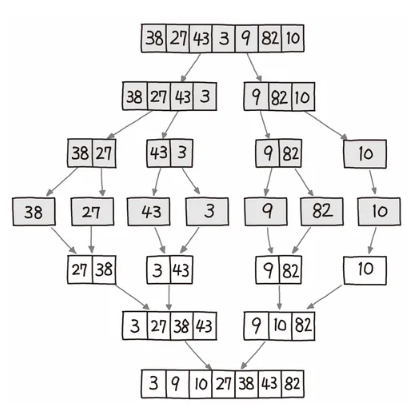

출처: 파이썬 알고리즘 인터뷰

#### Heap Sort: $O(n \log n)$

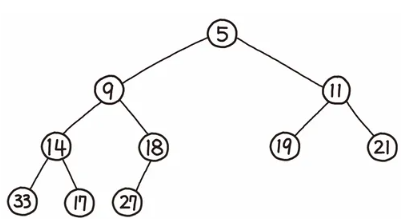

출처: 파이썬 알고리즘 인터뷰

In [ ]:
def heap_sort(a):

    def down_heap(a, left, right):

        temp = a[left]   # root

        parent = left
        while parent < (right + 1) // 2:
            cl = parent * 2 + 1     # left child
            cr = cl + 1
            child = cr if cr <= right and a[cr] > a[cl] else cl
            if temp >= a[child]:
                break
            a[parent] = a[child]
            parent = child
        a[parent] = temp

    n = len(a)

    # Step 1
    for i in range((n - 1) // 2, -1, -1):   # heap of a[i] ~ a[n-1]
        down_heap(a, i ,n -1)
    
    # Step 2
    for i in range(n - 1, 0, -1):
        a[0], a[i] = a[i], a[0]   # change maximum(a[0]) and the last element
        down_heap(a, 0, i -1)     # heap of a[0] ~ a[i-1]
    
    return a

In [42]:
k = heap_sort([8,1,5,9770,3,57,64,1248,999])
k

[1, 3, 5, 8, 57, 64, 999, 1248, 9770]

In [ ]:
# cf. built-in module: heapq
import heapq

def heap_sort(a):
    
    heap = []
    for i in a:
        heapq.heappush(heap, i)
    for i in range(len(a)):
        a[i] = heapq.heappop(heap)
    
    return a

In [10]:
k = heap_sort([8,1,5,9770,3,57,64,1248,999])
k

[1, 3, 5, 8, 57, 64, 999, 1248, 9770]

#### Quick Sort: $O(n \log n)$ in general, but...

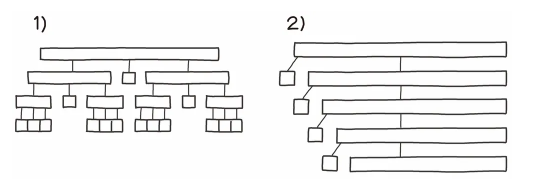

출처: 파이썬 알고리즘 인터뷰

### 3. **Counting Sort** for certain conditions.

* 이 정렬은 **비교하지 않습니다**(**Non-comparison Sort**)

* 컨셉: 정렬할 데이터 값들을 counting해서, **어떤 값이 몇 번 등장했는지** 기록해요. 이 정보를 바탕으로, 각 값이 정렬된 배열에서 어디에 위치해야 하는지를 결정해요.

* When?
    * 정렬할 데이터가 **정수** 또는 정수로 매핑될 수 있는 값이어야 해요.
    * 데이터 값의 범위가 너무 크지 않아야 해요.

#### How?

0. 입력 배열을 `arr`, 정렬된 결과를 담을 배열을 `output_arr`이라고 합시다.

1. 최댓값(k) 찾기
* `arr`에서 가장 큰 값 `k`를 찾아요(만약 음수가 섞여있다면, 최솟값도 함께 찾아서 범위를 정해주거나, 모든 수를 양수로 만들기 위한 offset을 고려해요).

2. **Count Array** 생성 및 초기화
* 크기가 k+1인 `count_arr` 배열을 생성하고, 모든 값을 0으로 초기화해요.
* `count_arr`의 **인덱스는 원본 입력 데이터의 값**을 나타내고, 해당 인덱스의 값은 그 원본 데이터의 값이 몇 번 등장했는지를 저장해요.

3. 원본 각 요소의 개수 카운팅
* `arr`을 순회하면서 각 요소 `x`에 대해 `count_arr[x]`의 값을 1씩 증가시켜요.
* 이 단계가 끝나면, `count_arr[i]`에는 값 `i`가 입력 배열 `arr`에 몇 번 나타났는지 그 빈도수가 저장돼요.

4. **Prefix Sum** 계산(위치 정보로 변환)
* `count_arr`을 다시 순회하면서, 각 요소의 값을 이전 요소의 값과 더해 누적합으로 만들어요.
*  `count_arr[i] += count_arr[i-1]`, where i: 1 ~ k
* 이제 `count_arr[i]`에는 값 `i`보다 작거나 같은 요소들의 총 개수가 저장되어 있어요. 이 정보는 각 요소가 정렬된 `output_arr`에서 차지해야 할 **마지막 위치**를 알려줘요.

5. 정렬된 위치에 요소 배치
* 결과를 담을 `output_arr`을 `arr`과 같은 크기로 준비해요.
* `arr`을 **뒤에서부터 앞으로** 순회해요(for Stable Sort)
* 각 요소 `x`에 대해:
    * `count_arr[x]` 값을 확인해요. 이 값은 `x`가 `output_arr`에 들어가야 할 위치를 나타내요.
    * 그러니까 `output_arr[count_arr[x] - 1]` 위치에 `x`를 저장해요.
    * `count_arr[x]`의 값을 1 감소시켜요(다음에도 `x`가 또 나오면, 그 앞자리에 배치해야 되거든요).
* 이 과정이 끝나면 `output_arr`에 정렬된 결과가 담기게 돼요.

In [ ]:
print("count_arr의 인덱스")
print([0, 1, 2, 3, 4, 5, 6, 7, 8])
print('================================')
print()

# e.g.
arr = [4, 2, 2, 8, 3, 3, 1]

# 최댓값: 8
k = max(arr)

# Count Array
count_arr = [0] * 9            # k + 1
print(count_arr)
print()


# Counting Start
# 1: count_arr[1] += 1
# 2: count_arr[2] += 1
# 2: count_arr[2] += 1
# ...
# 8: count_arr[8] += 1
for i in arr:
    count_arr[i] += 1
print(count_arr)
print()


# Prefix Sum
for i in range(len(count_arr)-1):
    count_arr[i+1] += count_arr[i]
print(count_arr)
print()


# output arrangement
output_arr = [0] * len(arr)
for i in reversed(arr):
    output_arr[count_arr[i] - 1] = i
    count_arr[i] -= 1

print('================================')
print('결과')
print(output_arr)
print()
print("count arr")
print(count_arr)

count_arr의 인덱스
[0, 1, 2, 3, 4, 5, 6, 7, 8]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

[0, 1, 2, 2, 1, 0, 0, 0, 1]

[0, 1, 3, 5, 6, 6, 6, 6, 7]

결과
[1, 2, 2, 3, 3, 4, 8]

count arr
[0, 0, 1, 3, 5, 6, 6, 6, 6]


#### review: counting sort

**Strength**
* 조건이 맞으면(정수 데이터, minmax 범위 k가 데이터 개수 n에 비해 너무 크지 않으면) 정말 빨라요
* 구현이 비교적 간단해요
* stable sort에요

**Weakness**
* 정수로 매핑 못하면 못 써먹어요
* k가 매우 크면 공간 복잡도 이슈가 생겨요
* 값의 종류는 많은데, 실제 개수가 적을 때 비효율적일 수도 있어요.

**HOW?**
* Counting Sort는 조건만 맞으면 $O(n \log n)$보다 빠른 $O(n)$ 성능을 낼 수 있어요. **시간 제한이 매우 엄격하거나, 데이터 특성이 명확한 문제에서 '히든카드'로 사용해요.**